In [1]:
import GlobalVars as gv
import os
import pandas as pd
#import datetime as dt
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
Files= os.listdir(gv.HistDir)
#Files= [gv.HistDir+'INFY.NS.csv']
ResultFile=gv.HistDir+'Result.csv'
ReadCols = ['Action', 'Close', 'Date', 'DivDays', 'PrevRSIDiv', 'RSI', 'RSIDiv', 'Stock']
WriteCols = ['Stock','RSI', 'PrevRSI','DivDays','RSIDiv', 'Action', 'Date']
print(ReadCols)
First=True
print(Files)
for i in Files:
    if ('.NS.csv' in i): 
        print(i, end=' ')
        df=pd.read_csv(gv.HistDir + i, index_col=0)
        df=df[ReadCols]; df['PrevRSI']=np.NaN
        for i, Row in df.iterrows():
            if(not Row['DivDays'] > 0): continue
            df.at[i, "PrevRSI"]= df.loc[Row['PrevRSIDiv'] , 'RSI']
        df=df[(df['DivDays'] > 0)]; df=df[WriteCols]
        if (First):
            First=False
            df.to_csv(ResultFile)
        else:
            df.to_csv(ResultFile, mode='a', header=False)     

['Action', 'Close', 'Date', 'DivDays', 'PrevRSIDiv', 'RSI', 'RSIDiv', 'Stock']
['ABAN.NS.csv', 'ABCAPITAL.NS.csv', 'ABFRL.NS.csv', 'ACC.NS.csv', 'ADANIENT.NS.csv', 'ADANIPORTS.NS.csv', 'ADANIPOWER.NS.csv', 'AJANTPHARM.NS.csv', 'ALBK.NS.csv', 'ALKEM.NS.csv', 'AMARAJABAT.NS.csv', 'AMBUJACEM.NS.csv', 'ANDHRABANK.NS.csv', 'APOLLOHOSP.NS.csv', 'APOLLOTYRE.NS.csv', 'APTECHT.NS.csv', 'ASHOKLEY.NS.csv', 'ASIANPAINT.NS.csv', 'AUBANK.NS.csv', 'AUROPHARMA.NS.csv', 'AXISBANK.NS.csv', 'BAJAJ-AUTO.NS.csv', 'BAJAJFINSV.NS.csv', 'BAJAJHLDNG.NS.csv', 'BAJFINANCE.NS.csv', 'bakup', 'BALAJITELE.NS.csv', 'BALKRISIND.NS.csv', 'BANDHANBNK.NS.csv', 'BANKBARODA.NS.csv', 'BANKINDIA.NS.csv', 'BATAINDIA.NS.csv', 'BBTC.NS.csv', 'BEL.NS.csv', 'BERGEPAINT.NS.csv', 'BHARATFORG.NS.csv', 'BHARTIARTL.NS.csv', 'BHEL.NS.csv', 'BIOCON.NS.csv', 'BOSCHLTD.NS.csv', 'BPCL.NS.csv', 'BRITANNIA.NS.csv', 'CADILAHC.NS.csv', 'CANBK.NS.csv', 'CASTROLIND.NS.csv', 'CENTRALBK.NS.csv', 'CESC.NS.csv', 'CHENNPETRO.NS.csv', 'CHOLAFIN.NS.csv

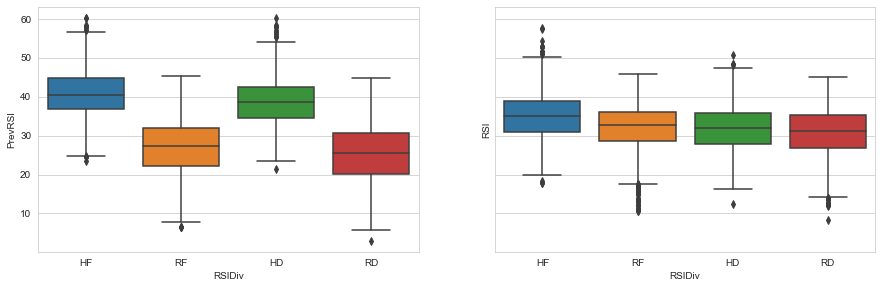

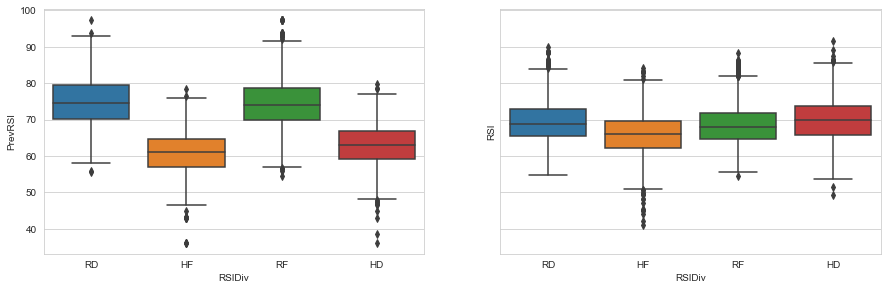

In [3]:
#default whisker of whis= 1.5 or (Q1 - 1.5 * IQR) |(Q3 + 1.5 * IQR)
Data=pd.read_csv(ResultFile, index_col=0)

for i in [1,-1]:
    Trade=Data[(Data['Action'] == i)]
    sns.set_style("whitegrid") 
    fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True)
    fig.set_size_inches(15, 4.5)

    sns.boxplot(x = 'RSIDiv', y = 'PrevRSI', data = Trade, ax=ax1)
    sns.boxplot(x = 'RSIDiv', y = 'RSI', data = Trade, ax=ax2)

#sns.regplot(x=idx, y=df['x'], ax=ax1)
#sns.regplot(x=idx, y=df['y'], ax=ax2)